### Задания для самостоятельного выполнения

На всех графиках должны быть подписаны оси (величина, единица измерения), где это применимо, и сделаны легенды, если на графике больше одной линии. Графики могут быть на одном рисунке или на разных. Графики сохранить в файлы.

#### Задание 1

Построить график функции $ f(x) = x^2 - 2x + 5 $ на промежутке от &minus;2 до 4 с шагом 0.1.

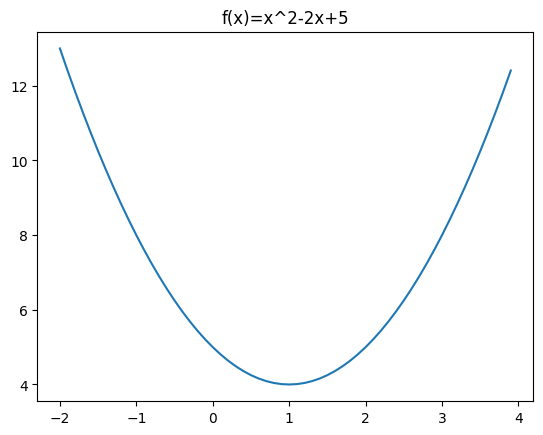

In [24]:
import matplotlib.pyplot as plt

x = [i / 10 for i in range(-20, 40)]
y = [i ** 2 - 2 * i + 5 for i in x]
plt.plot(x, y)
plt.title("f(x)=x^2-2x+5")
plt.show()

#### Задание 2

На том же графике построить график функции $ g(x) = 2x - 2 $. Задайте первому графику чёрный цвет, а второму &mdash; красный.

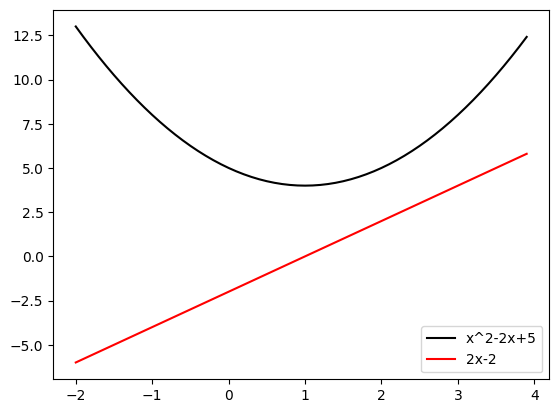

In [23]:
x = [i / 10 for i in range(-20, 40)]
y = [i ** 2 - 2 * i + 5 for i in x]
y2 = [2 * i - 2 for i in x]
plt.plot(x, y, color="black", label="x^2-2x+5")
plt.plot(x, y2, color="red", label="2x-2")
plt.legend()
plt.show()

#### Задание 3

1. Открыть файл d07_s02_01_tempo.txt, считать из него данные (это таблица `tsv`). Таблица содержит данные для вычисления темпа одного из собеседников в диалоге: номер реплики, время начала и конца (в секундах), роль в совместном задании (L &mdash; ведущий, F &mdash; ведомый), количество слогов в реплике. Если роль реплики помечена как NOUSE, её надо пропустить.
2. Построить график зависимости темпа речи от времени начала реплики (т.е. график, показывающий, как темп диктора менялся в течение диалога)
3. Построить точечный график зависимости темпа речи от длительности реплики (верно ли, что более длинные реплики произносятся быстрее?)
4. Построить столбчатую или круговую диаграмму распределения реплик по ролям.
5. Построить гистограмму распределения длины реплик в слогах.

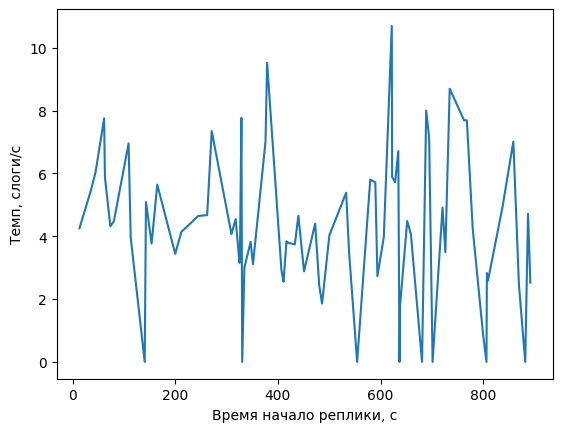

In [ ]:
import csv

with open("../files/d07_s02_01_tempo.txt", newline="") as f:
    reader = csv.DictReader(f, delimiter="\t")
    data = list(reader)

for row in data:
    row["start"] = float(row["start"])
    row["end"] = float(row["end"])
    row["num_syllables"] = int(row["num_syllables"])
    row["tempo"] = row["num_syllables"] / (row["end"] - row["start"])

# 2

x = [row["start"] for row in data if row["role"] != "NOUSE"]
y = [row["tempo"] for row in data if row["role"] != "NOUSE"]
plt.plot(x, y, label="Темп диктора s02")
plt.xlabel("Время начала реплики, с")
plt.ylabel("Темп, слоги/с")
plt.show()


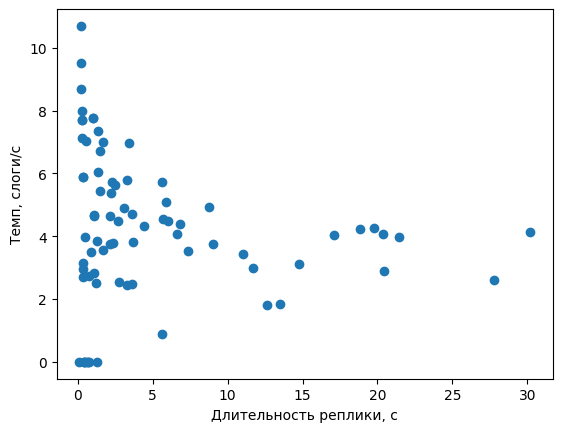

In [12]:
# 3

x = [(row["end"] - row["start"]) for row in data if row["role"] != "NOUSE"]
y = [row["tempo"] for row in data if row["role"] != "NOUSE"]

plt.scatter(x, y, label="Темп диктора s02")
plt.xlabel("Длительность реплики, с")
plt.ylabel("Темп, слоги/с")
plt.show()

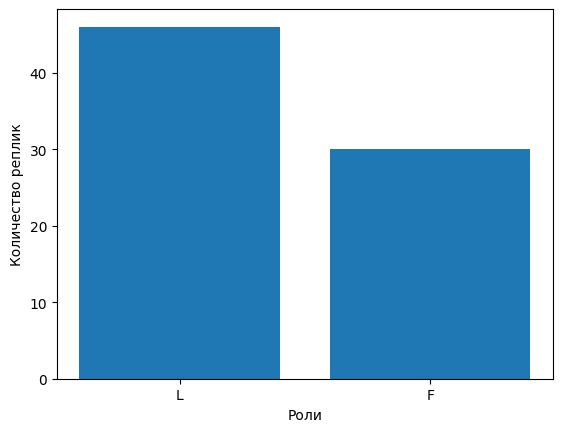

In [22]:
# 4
from collections import Counter

roles = Counter([row["role"] for row in data if row["role"] != "NOUSE"])
plt.bar(roles.keys(), roles.values())
plt.xlabel("Роли")
plt.ylabel("Количество реплик")
plt.show()

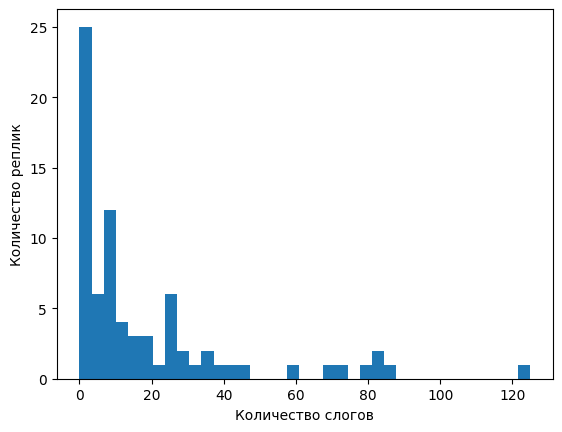

In [21]:
syllables = [row["num_syllables"] for row in data if row["role"] != "NOUSE"]
plt.hist(syllables, bins=len(set(syllables)))
plt.xlabel("Количество слогов")
plt.ylabel("Количество реплик")
plt.show()

#### Задание 4

1. Открыть файл d07_z06_01_tempo, содержащий данные о темпе второго собеседника.
2. Построить графики зависимости темпа обоих дикторов на одной иллюстрации (см. п. 2 из задания 3).

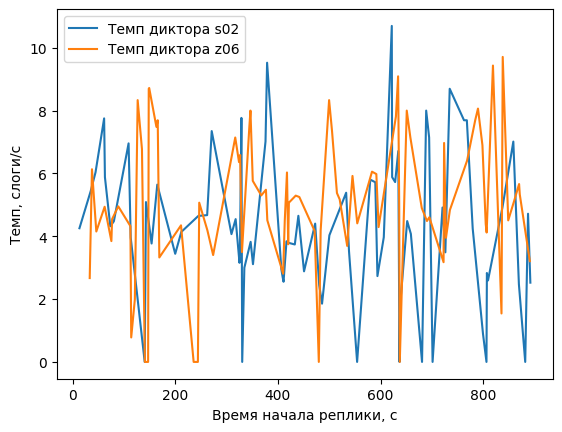

In [20]:
with open("../files/d07_z06_01_tempo.txt", newline="") as f:
    reader = csv.DictReader(f, delimiter="\t")
    data2 = list(reader)

for row in data2:
    row["start"] = float(row["start"])
    row["end"] = float(row["end"])
    row["num_syllables"] = int(row["num_syllables"])
    row["tempo"] = row["num_syllables"] / (row["end"] - row["start"])

x = [row["start"] for row in data if row["role"] != "NOUSE"]
x2 = [row["start"] for row in data2 if row["role"] != "NOUSE"]
y = [row["tempo"] for row in data if row["role"] != "NOUSE"]
y2 = [row["tempo"] for row in data2 if row["role"] != "NOUSE"]
plt.plot(x, y, label="Темп диктора s02")
plt.plot(x2, y2, label="Темп диктора z06")
plt.xlabel("Время начала реплики, с")
plt.ylabel("Темп, слоги/с")
plt.legend()
plt.show()


#### Задание 5 (*)

Построить любые другие графики на основании двух таблиц.